In [1]:
import pandas as pd
import requests
import datetime
import yfinance as yahooFinance

import matplotlib.pyplot as plt

import numpy as np

from statsmodels.tsa.stattools import adfuller

# Data preprocessing

In [316]:
ticket_name = 'AAPL'

In [317]:
data = yahooFinance.Ticker(ticket_name)


In [318]:
data

yfinance.Ticker object <AAPL>

In [319]:
df = data.history(period="10y")

In [320]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-10-18 00:00:00-04:00,15.771544,15.873468,15.762816,15.861936,290542000,0.0,0.0
2013-10-21 00:00:00-04:00,15.951704,16.342260,15.943912,16.250622,398106800,0.0,0.0
2013-10-22 00:00:00-04:00,16.408032,16.471618,15.835133,16.204182,534063600,0.0,0.0
2013-10-23 00:00:00-04:00,16.177061,16.384964,16.177061,16.362833,313723200,0.0,0.0
2013-10-24 00:00:00-04:00,16.364081,16.596919,16.284600,16.579464,384764800,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-11 00:00:00-04:00,178.199997,179.850006,177.600006,179.800003,47551100,0.0,0.0
2023-10-12 00:00:00-04:00,180.070007,182.339996,179.039993,180.710007,56743100,0.0,0.0
2023-10-13 00:00:00-04:00,181.419998,181.929993,178.139999,178.850006,51427100,0.0,0.0


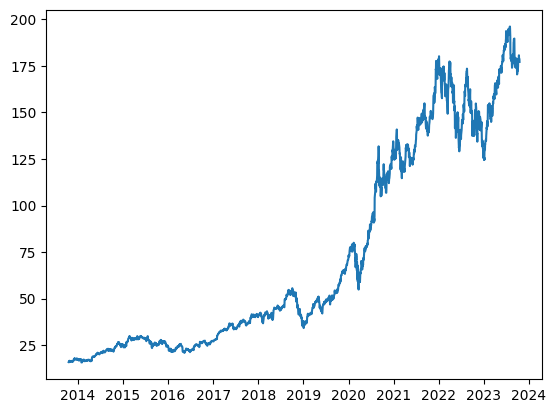

In [321]:
plt.plot(df.index,df['Close'])

In [322]:
df['New_Close'] = (1 / df['Stock Splits']).replace(np.inf, 1).cumprod() * df.Close

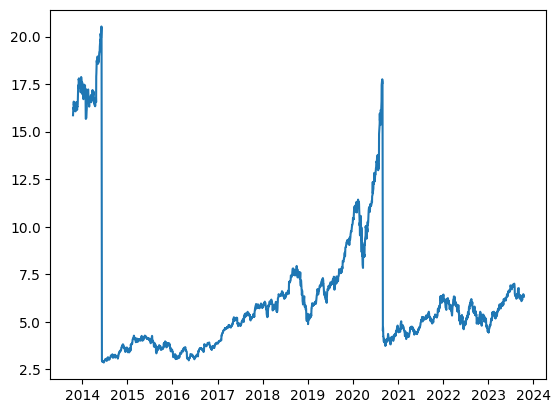

In [323]:
plt.plot(df.index,df['New_Close'])

In [324]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,New_Close
Date,,,,,,,,
2023-10-11 00:00:00-04:00,178.199997,179.850006,177.600006,179.800003,47551100,0.0,0.0,6.421429
2023-10-12 00:00:00-04:00,180.070007,182.339996,179.039993,180.710007,56743100,0.0,0.0,6.453929
2023-10-13 00:00:00-04:00,181.419998,181.929993,178.139999,178.850006,51427100,0.0,0.0,6.387500
2023-10-16 00:00:00-04:00,176.750000,179.080002,176.509995,178.720001,52517000,0.0,0.0,6.382857
2023-10-17 00:00:00-04:00,176.649994,178.419998,174.800003,177.149994,57515400,0.0,0.0,6.326785


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2013-10-18 00:00:00-04:00 to 2023-10-17 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2516 non-null   float64
 1   High          2516 non-null   float64
 2   Low           2516 non-null   float64
 3   Close         2516 non-null   float64
 4   Volume        2516 non-null   int64  
 5   Dividends     2516 non-null   float64
 6   Stock Splits  2516 non-null   float64
 7   New_Close     2516 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 176.9 KB


In [326]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,New_Close
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,72.587021,73.392567,71.829344,72.644738,1.420855e+08,0.002785,0.004372,6.317011
std,55.057591,55.712021,54.449632,55.107838,8.835053e+07,0.022537,0.160704,3.574813
min,15.524715,15.723798,15.473612,15.668932,3.145820e+07,0.000000,0.000000,2.863275
25%,26.559517,26.848802,26.355828,26.641349,8.361850e+07,0.000000,0.000000,4.075059
50%,44.816807,45.069717,44.456107,44.857288,1.151918e+08,0.000000,0.000000,5.306179
75%,128.779963,130.294015,126.987475,128.912243,1.750272e+08,0.000000,0.000000,6.540197
max,195.975362,197.962667,195.016650,196.185074,1.065523e+09,0.240000,7.000000,20.531017


In [327]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,New_Close
Date,,,,,,,,
2013-10-18 00:00:00-04:00,15.771544,15.873468,15.762816,15.861936,290542000,0.0,0.0,15.861936
2013-10-21 00:00:00-04:00,15.951704,16.342260,15.943912,16.250622,398106800,0.0,0.0,16.250622
2013-10-22 00:00:00-04:00,16.408032,16.471618,15.835133,16.204182,534063600,0.0,0.0,16.204182
2013-10-23 00:00:00-04:00,16.177061,16.384964,16.177061,16.362833,313723200,0.0,0.0,16.362833
2013-10-24 00:00:00-04:00,16.364081,16.596919,16.284600,16.579464,384764800,0.0,0.0,16.579464
...,...,...,...,...,...,...,...,...
2023-10-11 00:00:00-04:00,178.199997,179.850006,177.600006,179.800003,47551100,0.0,0.0,6.421429
2023-10-12 00:00:00-04:00,180.070007,182.339996,179.039993,180.710007,56743100,0.0,0.0,6.453929
2023-10-13 00:00:00-04:00,181.419998,181.929993,178.139999,178.850006,51427100,0.0,0.0,6.387500


### Ichimoku kinko hyo

In [328]:
high_prices = df['High']
close_prices = df['Close']
low_prices = df['Low']
nine_period_high = df['High'].rolling(window=9).max()
nine_period_low = df['Low'].rolling(window=9).min()
ichimoku = (nine_period_high + nine_period_low) /2
df['ichimoku'] = ichimoku
df.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,New_Close,ichimoku
Date,,,,,,,,,
2013-10-18 00:00:00-04:00,15.771544,15.873468,15.762816,15.861936,290542000,0.0,0.0,15.861936,NaN
2013-10-21 00:00:00-04:00,15.951704,16.342260,15.943912,16.250622,398106800,0.0,0.0,16.250622,NaN


### Exponontional Moving Average

In [329]:
df.loc[:,'ema'] = df.loc[:,'Close'].ewm(com=0.5).mean()

### Found differences

In [330]:
df.loc[:,'dClose']= df.loc[:,'Close'].diff().fillna(0)
# df.loc[:,'dichimoku']= df.loc[:,'ichimoku'].diff()
# df.loc[:,'dema'] = df.loc[:,'ema'].diff()
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,New_Close,ichimoku,ema,dClose
Date,,,,,,,,,,,
2023-10-04 00:00:00-04:00,171.089996,174.210007,170.970001,173.660004,53020300,0.0,0.0,6.202143,172.349998,173.292223,1.260010
2023-10-05 00:00:00-04:00,173.789993,175.449997,172.679993,174.910004,48527900,0.0,0.0,6.246786,172.294998,174.370743,1.250000
2023-10-06 00:00:00-04:00,173.800003,177.990005,173.179993,177.490005,57224100,0.0,0.0,6.338929,172.805000,176.450251,2.580002
2023-10-09 00:00:00-04:00,176.809998,179.050003,175.800003,178.990005,42390800,0.0,0.0,6.392500,173.334999,178.143421,1.500000
2023-10-10 00:00:00-04:00,178.100006,179.720001,177.949997,178.389999,43698000,0.0,0.0,6.371071,173.669998,178.307807,-0.600006
2023-10-11 00:00:00-04:00,178.199997,179.850006,177.600006,179.800003,47551100,0.0,0.0,6.421429,175.095001,179.302604,1.410004
2023-10-12 00:00:00-04:00,180.070007,182.339996,179.039993,180.710007,56743100,0.0,0.0,6.453929,176.580002,180.240873,0.910004
2023-10-13 00:00:00-04:00,181.419998,181.929993,178.139999,178.850006,51427100,0.0,0.0,6.387500,176.580002,179.313628,-1.860001
2023-10-16 00:00:00-04:00,176.750000,179.080002,176.509995,178.720001,52517000,0.0,0.0,6.382857,176.654999,178.917877,-0.130005


In [331]:
def getWeights(d,lags):
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1) 
    return w
def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot(figsize=(15,6))
    plt.legend(title='Порядок дифференцирования')
    plt.title('Коэфицент отстаивания для разлиных порядкоф дифференцировнаия')
    plt.xlabel('Коэфицент отстаивания')
    #plt.grid(False)
    plt.show()
def ts_differencing(series, order, lag_cutoff):
    # return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients
    
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:] 

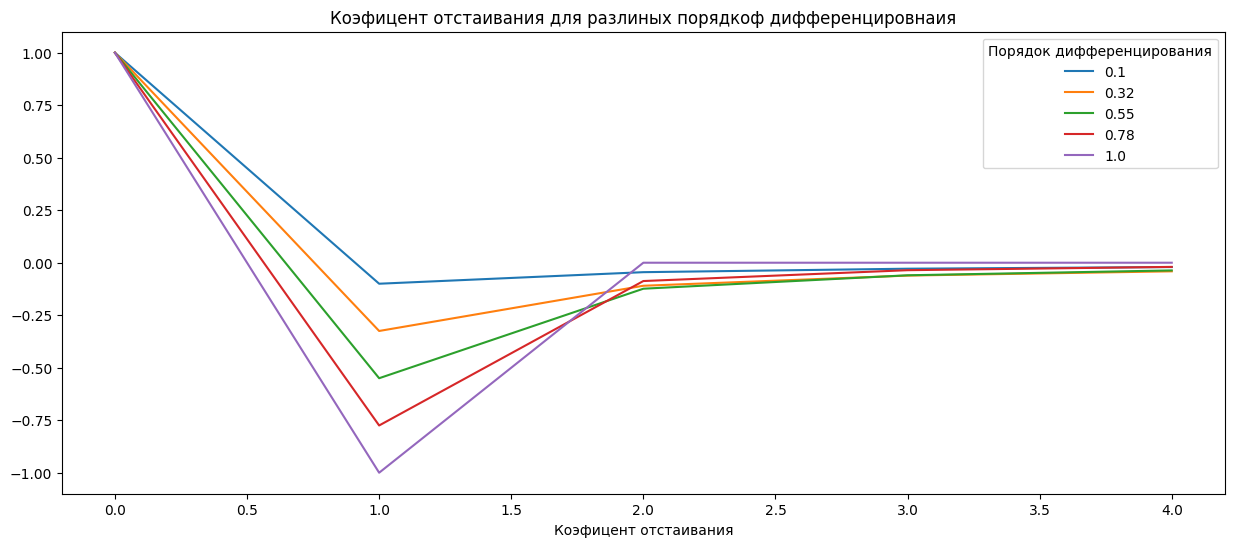

In [332]:
plotWeights([0.1,1],5,5)

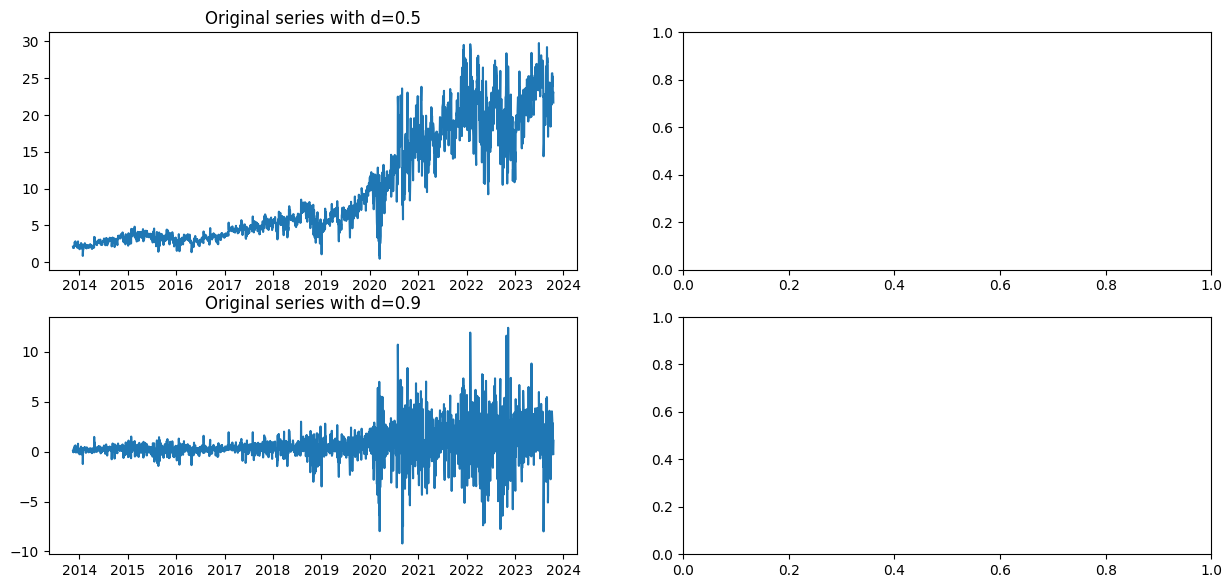

In [333]:
differences=[0.5,0.9]
fig, axs = plt.subplots(len(differences),2,figsize=(15,6))
for i in range(0,len(differences)):
    axs[i,0].plot(ts_differencing(df['Close'],differences[i],20))
    axs[i,0].set_title('Original series with d='+str(differences[i]))
    plt.subplots_adjust(bottom=0.01) 

In [334]:
def get_weights_floored(d, num_k, floor):
    w_k = np.array([1])
    k = 1
    while k < num_k:
        w_k_latest = -w_k[-1] * ((d - k + 1)) / k
        if abs(w_k_latest) <= floor:
            break
        w_k = np.append(w_k, w_k_latest)
        k += 1
    w_k = w_k.reshape(-1, 1) 
    return w_k, k

def ts_differencing_tau_new(series, order, tau):
    weights, lag_cutoff = get_weights_floored(order, len(series), tau)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:] 

tau=1e-6
frac_new = ts_differencing_tau_new(df['Close'],0.22,tau=tau)

In [335]:
possible_d=np.divide(range(1,100),100)
tau=1e-4
original_adf_stat_holder=[None]*len(possible_d)
log_adf_stat_holder=[None]*len(possible_d)

for i in range(len(possible_d)):
    original_adf_stat_holder[i]=adfuller(ts_differencing_tau_new(df['Close'],possible_d[i],tau))[1]

Text(0.5, 1.0, 'Значения р по тесту ADF обычных данных')

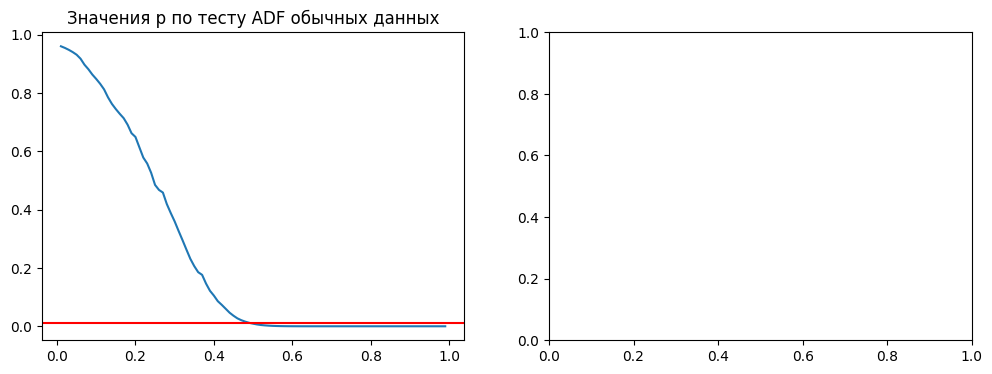

In [336]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(possible_d,original_adf_stat_holder)
axs[0].axhline(y=0.01,color='r')
axs[0].set_title('Значения р по тесту ADF обычных данных')

In [337]:
df.loc[:,'d_Close'] = ts_differencing_tau_new(df['Close'],0.4,tau=tau)

In [338]:
df['d_Close'].isnull().sum()

282

In [339]:
adf = adfuller(df['d_Close'].dropna())
print(f'p value: {adf[1]},', ', Series is stationary' if adf[1] < 0.05 else ", Series is Non-stationary"  )

p value: 0.10522003251024459, , Series is Non-stationary


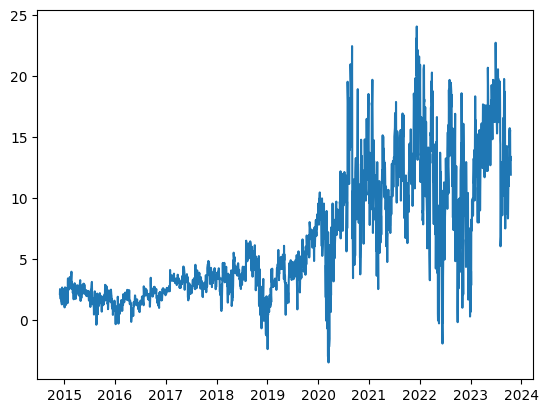

In [340]:
plt.plot(df.index,df['d_Close'])

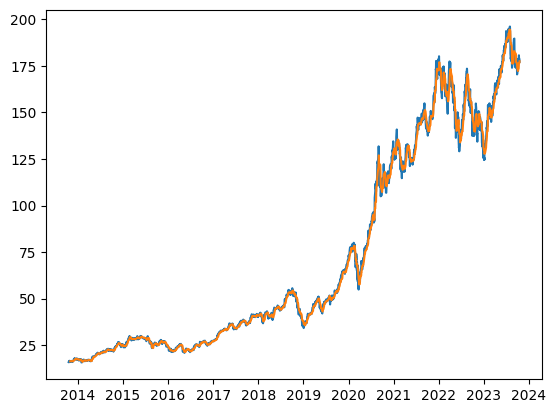

In [341]:
plt.plot(df.index,df['Close'])
plt.plot(df.index,df['ichimoku'])


In [342]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,New_Close,ichimoku,ema,dClose,d_Close
Date,,,,,,,,,,,,
2013-10-18 00:00:00-04:00,15.771544,15.873468,15.762816,15.861936,290542000,0.0,0.0,15.861936,NaN,15.861936,0.000000,NaN
2013-10-21 00:00:00-04:00,15.951704,16.342260,15.943912,16.250622,398106800,0.0,0.0,16.250622,NaN,16.153450,0.388686,NaN
2013-10-22 00:00:00-04:00,16.408032,16.471618,15.835133,16.204182,534063600,0.0,0.0,16.204182,NaN,16.188572,-0.046440,NaN
2013-10-23 00:00:00-04:00,16.177061,16.384964,16.177061,16.362833,313723200,0.0,0.0,16.362833,NaN,16.306198,0.158651,NaN
2013-10-24 00:00:00-04:00,16.364081,16.596919,16.284600,16.579464,384764800,0.0,0.0,16.579464,NaN,16.489128,0.216631,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-11 00:00:00-04:00,178.199997,179.850006,177.600006,179.800003,47551100,0.0,0.0,6.421429,175.095001,179.302604,1.410004,15.397929
2023-10-12 00:00:00-04:00,180.070007,182.339996,179.039993,180.710007,56743100,0.0,0.0,6.453929,176.580002,180.240873,0.910004,15.584961
2023-10-13 00:00:00-04:00,181.419998,181.929993,178.139999,178.850006,51427100,0.0,0.0,6.387500,176.580002,179.313628,-1.860001,13.073569


In [343]:
adf = adfuller(df['dClose'])
print(f'p value: {adf[1]},', ', Series is stationary' if adf[1] < 0.05 else ", Series is Non-stationary"  )

p value: 7.501034928511707e-21, , Series is stationary


In [344]:
df['reverse_diff'] = df['Close'].shift(1) + df['dClose']
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,New_Close,ichimoku,ema,dClose,d_Close,reverse_diff
Date,,,,,,,,,,,,,
2013-10-18 00:00:00-04:00,15.771544,15.873468,15.762816,15.861936,290542000,0.0,0.0,15.861936,NaN,15.861936,0.000000,NaN,NaN
2013-10-21 00:00:00-04:00,15.951704,16.342260,15.943912,16.250622,398106800,0.0,0.0,16.250622,NaN,16.153450,0.388686,NaN,16.250622
2013-10-22 00:00:00-04:00,16.408032,16.471618,15.835133,16.204182,534063600,0.0,0.0,16.204182,NaN,16.188572,-0.046440,NaN,16.204182
2013-10-23 00:00:00-04:00,16.177061,16.384964,16.177061,16.362833,313723200,0.0,0.0,16.362833,NaN,16.306198,0.158651,NaN,16.362833
2013-10-24 00:00:00-04:00,16.364081,16.596919,16.284600,16.579464,384764800,0.0,0.0,16.579464,NaN,16.489128,0.216631,NaN,16.579464
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-11 00:00:00-04:00,178.199997,179.850006,177.600006,179.800003,47551100,0.0,0.0,6.421429,175.095001,179.302604,1.410004,15.397929,179.800003
2023-10-12 00:00:00-04:00,180.070007,182.339996,179.039993,180.710007,56743100,0.0,0.0,6.453929,176.580002,180.240873,0.910004,15.584961,180.710007
2023-10-13 00:00:00-04:00,181.419998,181.929993,178.139999,178.850006,51427100,0.0,0.0,6.387500,176.580002,179.313628,-1.860001,13.073569,178.850006


In [345]:
df_pp = df.copy()
# df_pp = df[['dClose','dichimoku','dema']]
# df_pp = df[['Open','High','Low','Close','ichimoku','ema']]
df_pp = df[['d_Close']]
df_pp = df_pp.dropna()
df_pp

,d_Close
Date,
2014-12-02 00:00:00-05:00,2.141096
2014-12-03 00:00:00-05:00,2.535321
2014-12-04 00:00:00-05:00,2.353296
2014-12-05 00:00:00-05:00,2.260579
2014-12-08 00:00:00-05:00,1.718718
...,...
2023-10-11 00:00:00-04:00,15.397929
2023-10-12 00:00:00-04:00,15.584961
2023-10-13 00:00:00-04:00,13.073569


In [346]:
df_pp.reset_index(inplace=True)
df_pp

,Date,d_Close
0,2014-12-02 00:00:00-05:00,2.141096
1,2014-12-03 00:00:00-05:00,2.535321
2,2014-12-04 00:00:00-05:00,2.353296
3,2014-12-05 00:00:00-05:00,2.260579
4,2014-12-08 00:00:00-05:00,1.718718
...,...,...
2229,2023-10-11 00:00:00-04:00,15.397929
2230,2023-10-12 00:00:00-04:00,15.584961
2231,2023-10-13 00:00:00-04:00,13.073569
2232,2023-10-16 00:00:00-04:00,13.398556


In [347]:
import seaborn as sns

<Axes: >

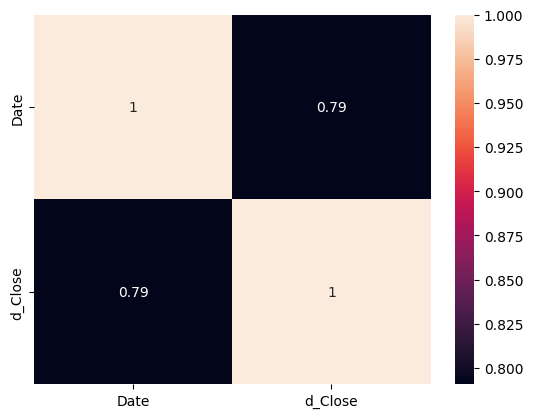

In [348]:
sns.heatmap(df_pp.corr(), annot=True)

In [349]:
def prepare_dataframe(df,n_steps):
    dc = df.copy()

    dc.set_index('Date',inplace=True)

    for i in range(1,n_steps+1):
        dc[f'dClose(t-{i})'] = dc['d_Close'].shift(i)
        # dc[f'Open(t-{i})'] = dc['Open'].shift(i)
        # dc[f'High(t-{i})'] = dc['High'].shift(i)
        # dc[f'Low(t-{i})'] = dc['Low'].shift(i)
        # dc[f'dichimoku(t-{i})'] = dc['ichimoku'].shift(i)
        # dc[f'dema(t-{i})'] = dc['ema'].shift(i)
    # dc = dc.drop(columns=['ichimoku','ema','Open','High','Low',])
    # dc = dc.drop(columns=['ichimoku','ema'])
    dc.dropna(inplace=True)


    return dc

In [350]:
lookback = 10
shifted_df = prepare_dataframe(df_pp,lookback)
shifted_df.head()

,d_Close,dClose(t-1),dClose(t-2),dClose(t-3),dClose(t-4),dClose(t-5),dClose(t-6),dClose(t-7),dClose(t-8),dClose(t-9),dClose(t-10)
Date,,,,,,,,,,,
2014-12-16 00:00:00-05:00,1.279275,1.405786,1.537612,1.879333,1.771957,2.343580,1.718718,2.260579,2.353296,2.535321,2.141096
2014-12-17 00:00:00-05:00,2.087789,1.279275,1.405786,1.537612,1.879333,1.771957,2.343580,1.718718,2.260579,2.353296,2.535321
2014-12-18 00:00:00-05:00,2.662224,2.087789,1.279275,1.405786,1.537612,1.879333,1.771957,2.343580,1.718718,2.260579,2.353296
2014-12-19 00:00:00-05:00,2.158266,2.662224,2.087789,1.279275,1.405786,1.537612,1.879333,1.771957,2.343580,1.718718,2.260579
2014-12-22 00:00:00-05:00,2.407537,2.158266,2.662224,2.087789,1.279275,1.405786,1.537612,1.879333,1.771957,2.343580,1.718718


<Axes: >

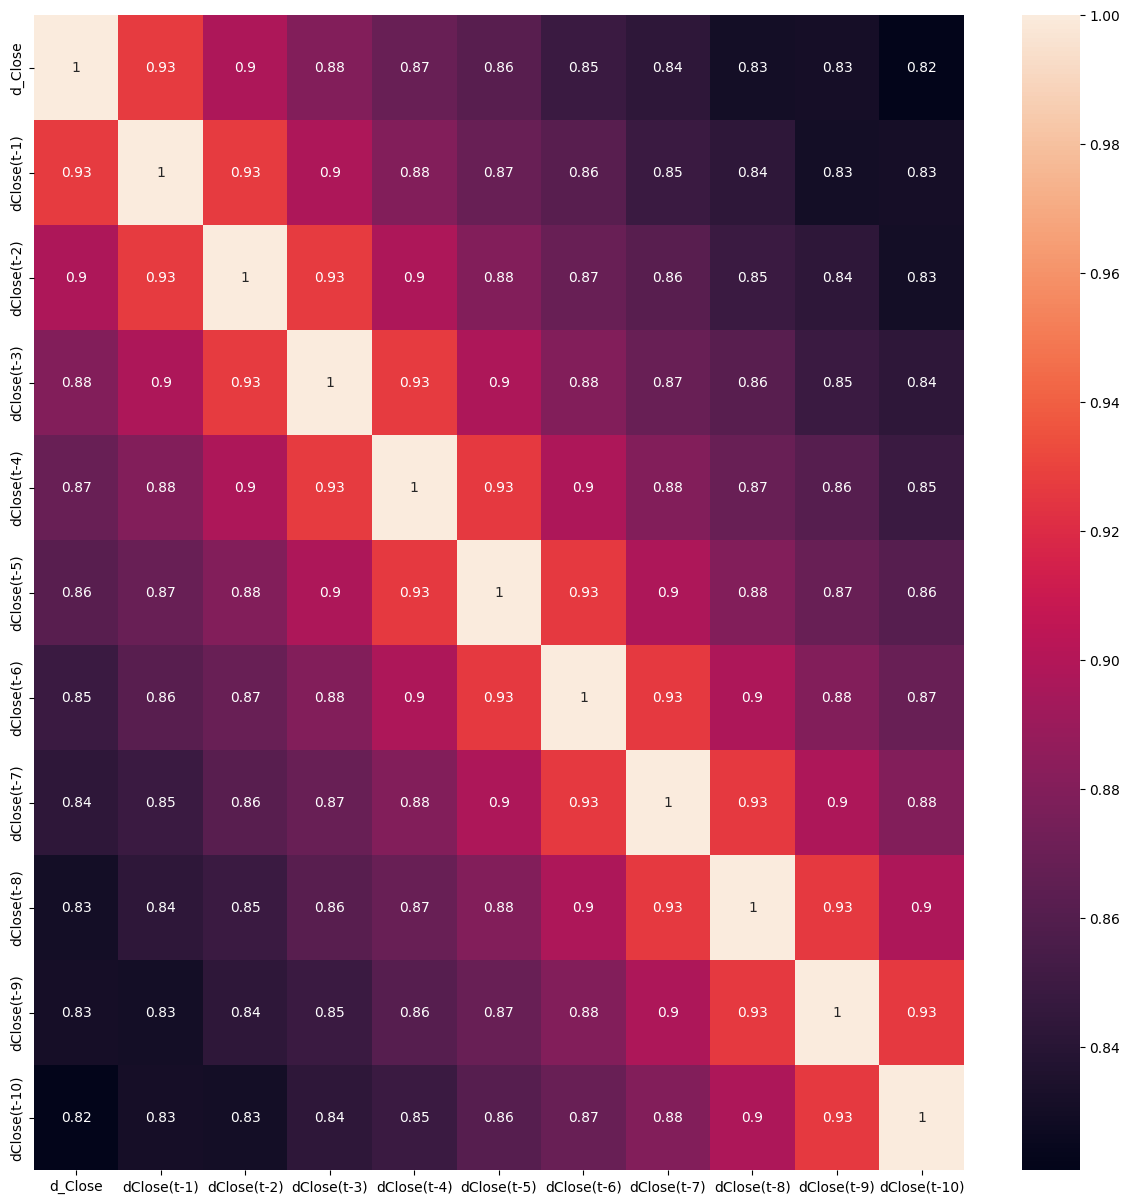

In [351]:
fif, ax = plt.subplots(figsize=(15,15))
sns.heatmap(shifted_df.corr(), annot=True, ax=ax)

----

# Model processing

In [352]:
import torch

In [353]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [354]:
shifted_df

,d_Close,dClose(t-1),dClose(t-2),dClose(t-3),dClose(t-4),dClose(t-5),dClose(t-6),dClose(t-7),dClose(t-8),dClose(t-9),dClose(t-10)
Date,,,,,,,,,,,
2014-12-16 00:00:00-05:00,1.279275,1.405786,1.537612,1.879333,1.771957,2.343580,1.718718,2.260579,2.353296,2.535321,2.141096
2014-12-17 00:00:00-05:00,2.087789,1.279275,1.405786,1.537612,1.879333,1.771957,2.343580,1.718718,2.260579,2.353296,2.535321
2014-12-18 00:00:00-05:00,2.662224,2.087789,1.279275,1.405786,1.537612,1.879333,1.771957,2.343580,1.718718,2.260579,2.353296
2014-12-19 00:00:00-05:00,2.158266,2.662224,2.087789,1.279275,1.405786,1.537612,1.879333,1.771957,2.343580,1.718718,2.260579
2014-12-22 00:00:00-05:00,2.407537,2.158266,2.662224,2.087789,1.279275,1.405786,1.537612,1.879333,1.771957,2.343580,1.718718
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-11 00:00:00-04:00,15.397929,14.139634,15.732704,15.439675,13.443529,12.597864,10.986142,13.223369,10.633629,9.755820,8.390557
2023-10-12 00:00:00-04:00,15.584961,15.397929,14.139634,15.732704,15.439675,13.443529,12.597864,10.986142,13.223369,10.633629,9.755820
2023-10-13 00:00:00-04:00,13.073569,15.584961,15.397929,14.139634,15.732704,15.439675,13.443529,12.597864,10.986142,13.223369,10.633629


In [355]:
#Mali4521

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim


In [357]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [358]:
columns = shifted_df.columns.to_list()
columns
len(columns)

11

In [359]:
shifted_df[columns] = scaler.fit_transform(shifted_df)

In [360]:
shifted_df

,d_Close,dClose(t-1),dClose(t-2),dClose(t-3),dClose(t-4),dClose(t-5),dClose(t-6),dClose(t-7),dClose(t-8),dClose(t-9),dClose(t-10)
Date,,,,,,,,,,,
2014-12-16 00:00:00-05:00,-0.654206,-0.645026,-0.635459,-0.610661,-0.618453,-0.576972,-0.622317,-0.582995,-0.576267,-0.563057,-0.591666
2014-12-17 00:00:00-05:00,-0.595534,-0.654206,-0.645026,-0.635459,-0.610661,-0.618453,-0.576972,-0.622317,-0.582995,-0.576267,-0.563057
2014-12-18 00:00:00-05:00,-0.553848,-0.595534,-0.654206,-0.645026,-0.635459,-0.610661,-0.618453,-0.576972,-0.622317,-0.582995,-0.576267
2014-12-19 00:00:00-05:00,-0.590420,-0.553848,-0.595534,-0.654206,-0.645026,-0.635459,-0.610661,-0.618453,-0.576972,-0.622317,-0.582995
2014-12-22 00:00:00-05:00,-0.572330,-0.590420,-0.553848,-0.595534,-0.654206,-0.645026,-0.635459,-0.610661,-0.618453,-0.576972,-0.622317
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-11 00:00:00-04:00,0.370360,0.279047,0.394654,0.373389,0.228532,0.167164,0.050204,0.212556,0.024623,-0.039078,-0.138153
2023-10-12 00:00:00-04:00,0.383932,0.370360,0.279047,0.394654,0.373389,0.228532,0.167164,0.050204,0.212556,0.024623,-0.039078
2023-10-13 00:00:00-04:00,0.201685,0.383932,0.370360,0.279047,0.394654,0.373389,0.228532,0.167164,0.050204,0.212556,0.024623


In [361]:
print(shifted_df.corr())

               d_Close  dClose(t-1)  dClose(t-2)  dClose(t-3)  dClose(t-4)  \
d_Close       1.000000     0.926625     0.897552     0.880227     0.868890   
dClose(t-1)   0.926625     1.000000     0.926627     0.897540     0.880276   
dClose(t-2)   0.897552     0.926627     1.000000     0.926599     0.897508   
dClose(t-3)   0.880227     0.897540     0.926599     1.000000     0.926601   
dClose(t-4)   0.868890     0.880276     0.897508     0.926601     1.000000   
dClose(t-5)   0.861630     0.868913     0.880218     0.897479     0.926522   
dClose(t-6)   0.848696     0.861626     0.868852     0.880169     0.897412   
dClose(t-7)   0.842849     0.848724     0.861563     0.868812     0.880037   
dClose(t-8)   0.830385     0.842860     0.848644     0.861509     0.868671   
dClose(t-9)   0.831034     0.830342     0.842776     0.848570     0.861431   
dClose(t-10)  0.820864     0.831001     0.830282     0.842722     0.848540   

              dClose(t-5)  dClose(t-6)  dClose(t-7)  dClose(t-8

In [362]:
data, test_data = train_test_split(shifted_df, test_size=0.10)
train_data, valid_data = train_test_split(data,test_size=0.10)

In [363]:
class CreateDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
         
    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        features = torch.tensor(row.iloc[1:])
        label = torch.tensor(row.iloc[0])
        return features.reshape(-1,1).float(),label.view(1).float()
    
    def __len__(self):
        return len(self.dataframe)

In [364]:
valid_data.head(1)

,d_Close,dClose(t-1),dClose(t-2),dClose(t-3),dClose(t-4),dClose(t-5),dClose(t-6),dClose(t-7),dClose(t-8),dClose(t-9),dClose(t-10)
Date,,,,,,,,,,,
2016-01-05 00:00:00-05:00,-0.71048,-0.672144,-0.690052,-0.66417,-0.631912,-0.67355,-0.657271,-0.641814,-0.668943,-0.668837,-0.716758


In [365]:
train_dataset = CreateDataset(dataframe=train_data)
train_loader = DataLoader(train_dataset, shuffle=True,batch_size = 8)

In [366]:
valid_dataset = CreateDataset(dataframe=valid_data)
valid_loader = DataLoader(valid_dataset, shuffle=True,batch_size = 8)

In [367]:
test_dataset = CreateDataset(dataframe=test_data)
test_loader = DataLoader(test_dataset, shuffle=True,batch_size = 8)

In [368]:
example = iter(train_loader)
feature, label = next(example)

/var/folders/bp/ykvfhsnd2gsdglqft1clt0sh0000gn/T/ipykernel_1355/341124280.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(row.iloc[1:])


In [369]:
feature.size(), label.size()

(torch.Size([8, 10, 1]), torch.Size([8, 1]))

In [370]:
device

'cpu'

In [371]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [372]:
len(shifted_df.columns)

11

In [373]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers,dropout, bidirectional):
        super().__init__()

        self.num_layers = num_layers
        self.hidden_size = hidden_dim
        self.bidirectional = bidirectional

        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self.columns_size = len(shifted_df.columns) -1

        self.linear1 = nn.Linear(input_dim, self.hidden_size)
        #self.batch1 = nn.BatchNorm1d(self.columns_size)
        self.relu = nn.ReLU()

        self.sigmoid = nn.Sigmoid()

        
        #self.batch2 = nn.BatchNorm1d(self.columns_size)

        self.lstm1 = nn.LSTM(self.hidden_size, self.hidden_size, num_layers,batch_first=True, dropout=dropout,bidirectional=bidirectional)
        
        if bidirectional: #2 more layers
            self.lstm2 = nn.LSTM(self.hidden_size*2, self.hidden_size, num_layers,batch_first=True, dropout=0.2,bidirectional=bidirectional)
            self.linear2 = nn.Linear(self.hidden_size*2, 1)
        else:
            self.lstm2 = nn.LSTM(self.hidden_size, self.hidden_size, num_layers,batch_first=True, dropout=0.2,bidirectional=bidirectional)
            self.linear2 = nn.Linear(self.hidden_size, 1)
        



    def forward(self, x):
       batch_size = x.size(0)
       if self.bidirectional:
           h0 = torch.zeros(self.num_layers*2, batch_size, self.hidden_size).to(self.device)
           c0 = torch.zeros(self.num_layers*2, batch_size, self.hidden_size).to(self.device)

           h1 = torch.zeros(self.num_layers*2, batch_size, self.hidden_size).to(self.device)
           c1 = torch.zeros(self.num_layers*2, batch_size, self.hidden_size).to(self.device)
       else:
           h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(self.device)
           c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(self.device)

           h1 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(self.device)
           c1 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(self.device)
           
       x = self.linear1(x)
       
       x = self.relu(x)
       
       
       h0, c0 = self.lstm1(x, (h0, c0))
       out = self.sigmoid(h0)
       #out = self.batch1(out)

       h1, c1 = self.lstm2(out, (h1, c1))
       out = self.sigmoid(h1)
       #out = self.batch2(out)
       out = self.linear2(out[:, -1, :])
       return out

In [374]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, hn = self.lstm(x, (h0.detach()))
        out = self.fc(out[:, -1]) 
        return out

In [375]:
# class LSTM(nn.Module):
#     def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
#         super(LSTM, self).__init__()
#         # Hidden dimensions
#         self.hidden_dim = hidden_dim

#         # Number of hidden layers
#         self.num_layers = num_layers

#         # batch_first=True causes input/output tensors to be of shape
#         # (batch_dim, seq_dim, feature_dim)
#         self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

#         # Readout layer
#         self.fc = nn.Linear(hidden_dim, output_dim)

#     def forward(self, x):
#         # Initialize hidden state with zeros
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

#         # Initialize cell state
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

#         # We need to detach as we are doing truncated backpropagation through time (BPTT)
#         # If we don't, we'll backprop all the way to the start even after going through another batch
#         out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

       
#         out = self.fc(out[:, -1, :]) 
        
#         return out

In [376]:
input_dim = 1
hidden_dim = 32
num_layers = 4
output_dim = 1


rnn = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, num_layers=num_layers,dropout=0.2,bidirectional=False)
rnn.to(device=device)
rnn

LSTM(
  (linear1): Linear(in_features=1, out_features=32, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (lstm1): LSTM(32, 32, num_layers=4, batch_first=True, dropout=0.2)
  (lstm2): LSTM(32, 32, num_layers=4, batch_first=True, dropout=0.2)
  (linear2): Linear(in_features=32, out_features=1, bias=True)
)

In [377]:
# rnn = GRU(input_dim=1,hidden_dim=4,num_layers=2,output_dim=1)
# rnn.to(device=device)
# rnn

In [378]:
def train_one_epoch():
    rnn.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
       
       
        output = rnn(x_batch)
        
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.5f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [379]:
def validate_one_epoch():
    rnn.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = rnn(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.5f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [380]:
learning_rate = 0.001
num_epochs = 50
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1


/var/folders/bp/ykvfhsnd2gsdglqft1clt0sh0000gn/T/ipykernel_1355/341124280.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(row.iloc[1:])


Batch 100, Loss: 0.14210
Batch 200, Loss: 0.07632

Val Loss: 0.05183
***************************************************

Epoch: 2
Batch 100, Loss: 0.04579
Batch 200, Loss: 0.04627

Val Loss: 0.05015
***************************************************

Epoch: 3
Batch 100, Loss: 0.04255
Batch 200, Loss: 0.04341

Val Loss: 0.04852
***************************************************

Epoch: 4
Batch 100, Loss: 0.04388
Batch 200, Loss: 0.05579

Val Loss: 0.05856
***************************************************

Epoch: 5
Batch 100, Loss: 0.05510
Batch 200, Loss: 0.05425

Val Loss: 0.04669
***************************************************

Epoch: 6
Batch 100, Loss: 0.04785
Batch 200, Loss: 0.04374

Val Loss: 0.04251
***************************************************

Epoch: 7
Batch 100, Loss: 0.03757
Batch 200, Loss: 0.03214

Val Loss: 0.03425
***************************************************

Epoch: 8
Batch 100, Loss: 0.02758
Batch 200, Loss: 0.02934

Val Loss: 0.02410
**************

In [381]:
# torch.save(rnn.to(torch.device('cpu')).state_dict(), './rnn_AMZN.pth')
# torch.save({
#     'model_state_dict':rnn.to(torch.device('cpu')).state_dict(),
#     'optimizer_state_dict':optimizer.state_dict(),
#     'loss':loss_function
#     }, './rnn_AMZN.pth')

In [382]:
shifted_df.tail(1)

,d_Close,dClose(t-1),dClose(t-2),dClose(t-3),dClose(t-4),dClose(t-5),dClose(t-6),dClose(t-7),dClose(t-8),dClose(t-9),dClose(t-10)
Date,,,,,,,,,,,
2023-10-17 00:00:00-04:00,0.117756,0.225269,0.201685,0.383932,0.37036,0.279047,0.394654,0.373389,0.228532,0.167164,0.050204


In [383]:
len(shifted_df.columns)

11

In [384]:
x_train = test_data.drop(columns=['d_Close']).to_numpy()
x_train = torch.from_numpy(x_train).reshape((-1,len(shifted_df.columns)-1,1)).float()

y_train = test_data['d_Close'].to_numpy()
y_train = torch.from_numpy(y_train).reshape((-1,1)).float()


In [385]:
x_train.size()


torch.Size([223, 10, 1])

In [386]:
x_train = shifted_df.tail(10).drop(columns=['d_Close']).to_numpy()
x_train = torch.from_numpy(x_train).reshape((-1,len(shifted_df.columns)-1,1)).float()

y_train = shifted_df.tail(10)['d_Close'].to_numpy()
y_train = torch.from_numpy(y_train).reshape((-1,1)).float()

In [387]:
with torch.no_grad():
    predicted = rnn(x_train.to(device)).to('cpu').numpy()

In [388]:
y_train

tensor([[0.1672],
        [0.2285],
        [0.3734],
        [0.3947],
        [0.2790],
        [0.3704],
        [0.3839],
        [0.2017],
        [0.2253],
        [0.1178]])

In [389]:
predicted

array([[0.06303895],
       [0.1378312 ],
       [0.17006959],
       [0.32525578],
       [0.3665663 ],
       [0.28881323],
       [0.3225283 ],
       [0.33944944],
       [0.21151493],
       [0.17416485]], dtype=float32)

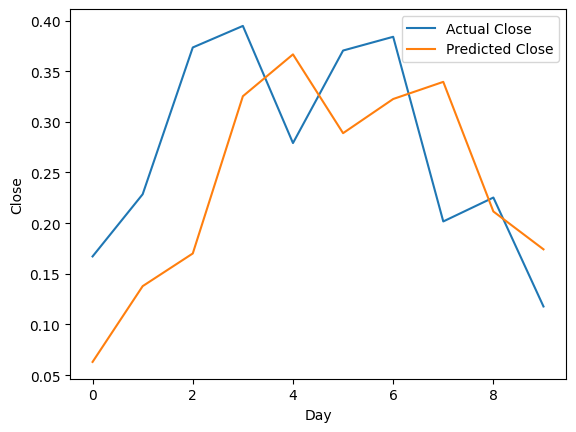

In [390]:
plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [391]:
import numpy as np

In [392]:
from copy import deepcopy as dc

In [393]:
train_predictions = predicted.flatten()

dummies = np.zeros((x_train.shape[0], len(shifted_df.columns)))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions[-1]

12.694340222912885

In [394]:
dummies = np.zeros((x_train.shape[0], len(shifted_df.columns)))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([12.59786453, 13.44352878, 15.43967517, 15.73270391, 14.13963428,
       15.39792956, 15.5849614 , 13.07356882, 13.39855563, 11.91701219])

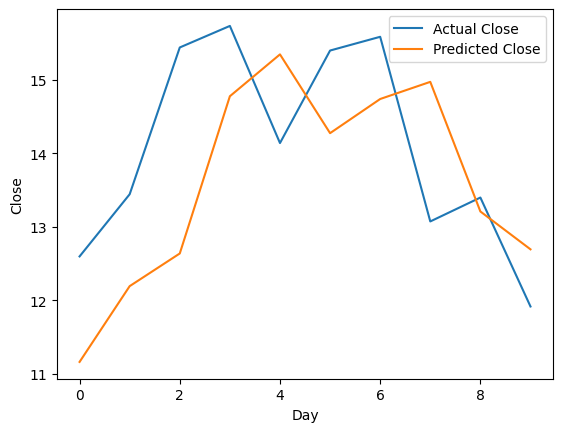

In [395]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [396]:
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error

In [397]:
evs = explained_variance_score(new_y_train, train_predictions)
evs

-0.02836446538237314

In [398]:
r2 = r2_score(new_y_train, train_predictions)
r2

-0.1568488045019354

In [399]:
rmse = np.sqrt(mean_squared_error(new_y_train, train_predictions))
rmse

1.4164310112785328

In [400]:
adj_r2 = 1 - (1-r2)*((train_predictions.size-1)/(train_predictions.size-10-1))
adj_r2

11.411639240517419

In [401]:
shifted_df

,d_Close,dClose(t-1),dClose(t-2),dClose(t-3),dClose(t-4),dClose(t-5),dClose(t-6),dClose(t-7),dClose(t-8),dClose(t-9),dClose(t-10)
Date,,,,,,,,,,,
2014-12-16 00:00:00-05:00,-0.654206,-0.645026,-0.635459,-0.610661,-0.618453,-0.576972,-0.622317,-0.582995,-0.576267,-0.563057,-0.591666
2014-12-17 00:00:00-05:00,-0.595534,-0.654206,-0.645026,-0.635459,-0.610661,-0.618453,-0.576972,-0.622317,-0.582995,-0.576267,-0.563057
2014-12-18 00:00:00-05:00,-0.553848,-0.595534,-0.654206,-0.645026,-0.635459,-0.610661,-0.618453,-0.576972,-0.622317,-0.582995,-0.576267
2014-12-19 00:00:00-05:00,-0.590420,-0.553848,-0.595534,-0.654206,-0.645026,-0.635459,-0.610661,-0.618453,-0.576972,-0.622317,-0.582995
2014-12-22 00:00:00-05:00,-0.572330,-0.590420,-0.553848,-0.595534,-0.654206,-0.645026,-0.635459,-0.610661,-0.618453,-0.576972,-0.622317
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-11 00:00:00-04:00,0.370360,0.279047,0.394654,0.373389,0.228532,0.167164,0.050204,0.212556,0.024623,-0.039078,-0.138153
2023-10-12 00:00:00-04:00,0.383932,0.370360,0.279047,0.394654,0.373389,0.228532,0.167164,0.050204,0.212556,0.024623,-0.039078
2023-10-13 00:00:00-04:00,0.201685,0.383932,0.370360,0.279047,0.394654,0.373389,0.228532,0.167164,0.050204,0.212556,0.024623


In [ ]:
model = LSTM(input_size=1,hidden_size=16,num_layers=4,dropout=0.2,bidirectional=False)
# model = GRU(input_dim=1,hidden_dim=4,num_layers=2,output_dim=1)
checkpoint = torch.load('./rnn_AMZN.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.to(torch.device('cpu'))
model.eval()

In [ ]:
train_dataset = CreateDataset(dataframe=shifted_df.tail(500))
train_loader = DataLoader(train_dataset, shuffle=False,batch_size = 8)

In [ ]:
learning_rate = 0.001
num_epochs = 50

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

loss_function = checkpoint['loss']

In [ ]:
for i in range(num_epochs+1):
    print(f'Epoch: {i + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
            x_batch, y_batch = batch[0].to(device), batch[1].to(device)


            output = model(x_batch)

            loss = loss_function(output, y_batch)
            running_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if batch_index % 100 == 1:  # print every 100 batches
                avg_loss_across_batches = running_loss / 100
                print('Batch {0}, Loss: {1:.5f}'.format(batch_index+1,
                                                        avg_loss_across_batches))
                running_loss = 0.0

In [ ]:
x_train = shifted_df.tail(10).drop(columns=['Close']).to_numpy()
x_train = torch.from_numpy(x_train).reshape((-1,lookback,1)).float()

y_train = shifted_df.tail(10)['Close'].to_numpy()
y_train = torch.from_numpy(y_train).reshape((-1,1)).float()

In [ ]:
predicted

In [ ]:
with torch.no_grad():
    predicted = model(x_train.to(device)).to('cpu').numpy()

In [ ]:
plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
evs = explained_variance_score(predicted, y_train)
evs

In [ ]:
r2 = r2_score(predicted, y_train)
r2